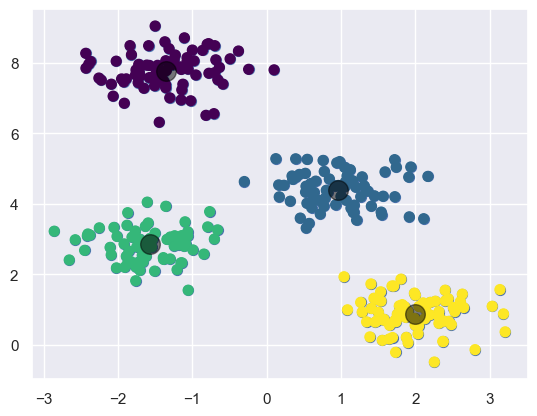

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
import seaborn as sns; sns.set()
import warnings

# Suppress specific warnings related to scikit-learn and MKL
warnings.filterwarnings("ignore", category=UserWarning, message=".*KMeans is known to have a memory leak on Windows with MKL.*")

x,y=make_blobs(n_samples =300,cluster_std=0.5,centers=4, random_state=0)
plt.scatter(x[:,0],x[:,1],s=50)
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4,n_init=10)
kmeans.fit(x)
y_means= kmeans.predict(x)
y_means



from sklearn.metrics import pairwise_distances_argmin as pda
def find_clusters(x,y,n_clusters,rseed=2):
    rng=np.random.RandomState(rseed)
    i=rng.permutation(x.shape[0])[:n_clusters]
    centers=x[i]
    while True:
        labels=pda(x,centers)
        newcenter=np.array([x[labels==i].mean(0) for i in range(n_clusters)])
        if np.all(centers==newcenter):
            break
        centers=newcenter
    return centers,labels
centers,labels = find_clusters(x,y,4)
plt.scatter(x[:,0],x[:,1],c=y_means,s=50,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5)